In [2]:
 #import all necessary libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the csv file and if we want data to come in new row use lineterminator
df= pd.read_csv('mymoviedb.csv',lineterminator='\n')

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [6]:
#we see that released date is string type thts why we need to cleanup this col and change string to datetime
#then we see tht theres no null value all the values are present in each column

In [7]:
#lets access the genre col from the df
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [8]:
#in the genre col we see that there is a genre then comma and then followed by with a whitespace.
#we might have to remove the whitespace
#then we need to also check if a movie is repeated again or not


In [9]:
''' 
3 problems we found till now
1.if the same movie is repeated or not
2.to convert the object datatype of the released date to datetime
3.to remove the whitespace from the genre col
'''

' \n3 problems we found till now\n1.if the same movie is repeated or not\n2.to convert the object datatype of the released date to datetime\n3.to remove the whitespace from the genre col\n'

In [10]:
#to ccheck if a movie is duplicate
df.duplicated().sum()

np.int64(0)

In [11]:
#if we want to apply statistics on our data (only int,float,decimal type) then we use a function called describe()
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [36]:
#keep only the necessary data that u want. all unnecssary col delete it
#no need of overview original_lang and poster_url

# DATA PREPROCESSING

In [13]:
#In data preprocessing we have to do 5 things 
#1.change the released date col dtype to datetime
#2.remove whitespace from the genre col
#3.remove unnecessary col
#4.there is noticable outliers in popularity col
#5.vote_average better be categorised for proper analysis


In [14]:
#in our analysis weve been asked which year has the most filmmed movies
#its asking us for the year and not month and date
#so first  convert released date to date time and in that well access just the year

df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [15]:
#now in this also we just need to convert it to year therefore apply dt.year method of datetime
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [16]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [17]:
#dropping the unecessary columns
#lets create a list to store the columns that we want to drop

#cols=['Overview','Original_Language','Poster_Url']

In [18]:
#all columns are on axis=1 and inplace=True means i want this change to be permanent
#df.drop(cols, axis = 1, inplace = True) 
#to show the remaining col tht are present
#df.columns 

In [19]:
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [20]:
#now in the vote_average col what we will do is:
#instead of numbers we will give labels eg if more than 8 that means good if less than 8 that means average and so on..


categorizing vote_average column

we would cut the vote_average values and make 4 categories: popular, average, below_avg, not_popular to describe it more using categorize_col() function provided above.

In [21]:
#lets create a user defined function to define the categories.
#we need to pass our dataframe, cols and labels as arguments

def categorize_col(df,col,labels):
    #we know theres a min max and avg values in our col and acc to that create our labels
    #according to those we will categorize
    #lets create a variable that will first store the min label then well create for 25% then create for 50% then create for 75% and then create for max
    #pass in ur col in the dataframe and apply describe() function on min,25,50,75,max
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']
          ]
    #now we use cut() method to give labels to the numbers
    #so in the edges that we created we will now give labels
    df[col]=pd.cut(df[col], edges, labels= labels, duplicates='drop')
    return df
    

In [22]:
'''
Imagine you have a bunch of students and their test scores (out of 100):

Student	Score
Alice	45
Bob	    62
Carol	85
David	95
Eve	    55

What the function does: It converts exact scores into simple categories like "Bad", "Okay", "Good", "Excellent

1. The edges (cutoff points): lets say our cutoff points on how were deciding the limits are min,25,50,75,max
edges = [min, 25%, 50%, 75%, max]
This is like deciding where to draw the lines between grades:

min = lowest score (let's say 45)

25% = score where 25% of students did worse (maybe 50)

50% = middle score (maybe 60)

75% = score where 75% of students did worse (maybe 80)

max = highest score (95)

2. The labels
These are the grade names you want:
labels = ["Very Bad", "Bad", "Good", "Excellent"]

3. Putting them together
Now we match scores to labels using the edges:

45-50 → "Very Bad"

50-60 → "Bad"

60-80 → "Good"

80-95 → "Excellent"

Final result:

Student	Score	Category
Alice	45	    Very Bad
Bob	    62	    Good
Carol	85	    Excellent
David	95	    Excellent
Eve	    55	    Bad
'''

'\nImagine you have a bunch of students and their test scores (out of 100):\n\nStudent\tScore\nAlice\t45\nBob\t    62\nCarol\t85\nDavid\t95\nEve\t    55\n\nWhat the function does: It converts exact scores into simple categories like "Bad", "Okay", "Good", "Excellent\n\n1. The edges (cutoff points): lets say our cutoff points on how were deciding the limits are min,25,50,75,max\nedges = [min, 25%, 50%, 75%, max]\nThis is like deciding where to draw the lines between grades:\n\nmin = lowest score (let\'s say 45)\n\n25% = score where 25% of students did worse (maybe 50)\n\n50% = middle score (maybe 60)\n\n75% = score where 75% of students did worse (maybe 80)\n\nmax = highest score (95)\n\n2. The labels\nThese are the grade names you want:\nlabels = ["Very Bad", "Bad", "Good", "Excellent"]\n\n3. Putting them together\nNow we match scores to labels using the edges:\n\n45-50 → "Very Bad"\n\n50-60 → "Bad"\n\n60-80 → "Good"\n\n80-95 → "Excellent"\n\nFinal result:\n\nStudent\tScore\tCategory\n

In [23]:
'''
df[col].describe() gives you a summary of statistics for a column.
For example, if you have test scores:
count     5.000000
mean     68.400000
std      20.742648
min      45.000000
25%      55.000000  # ← This is the first quartile
50%      62.000000  # ← This is the median
75%      85.000000  # ← This is the third quartile
max      95.000000

So when we write:
edges = [df[col].describe()['min'],#.describe summary of statistics provide karegi for our col and in that search for min value
         df[col].describe()['25%'], 
         df[col].describe()['50%'],
         df[col].describe()['75%'],
         df[col].describe()['max']]
#df[col] =>we are accessing the col from our df
#.describe()=>provides us with summary of statistics of tht col
#['min']..=>after getting the sumarry of stats find the min, max, 25%,50%,75% value in that

We're basically saying:

"Go look at the column's statistics"

"Find the minimum value" → ['min']

"Find the 25th percentile value" → ['25%']

"Find the median value" → ['50%']

"Find the 75th percentile value" → ['75%']

"Find the maximum value" → ['max']
What you get:
edges = [45, 55, 62, 85, 95]
'''

'\ndf[col].describe() gives you a summary of statistics for a column.\nFor example, if you have test scores:\ncount     5.000000\nmean     68.400000\nstd      20.742648\nmin      45.000000\n25%      55.000000  # ← This is the first quartile\n50%      62.000000  # ← This is the median\n75%      85.000000  # ← This is the third quartile\nmax      95.000000\n\nSo when we write:\nedges = [df[col].describe()[\'min\'],#.describe summary of statistics provide karegi for our col and in that search for min value\n         df[col].describe()[\'25%\'], \n         df[col].describe()[\'50%\'],\n         df[col].describe()[\'75%\'],\n         df[col].describe()[\'max\']]\n#df[col] =>we are accessing the col from our df\n#.describe()=>provides us with summary of statistics of tht col\n#[\'min\']..=>after getting the sumarry of stats find the min, max, 25%,50%,75% value in that\n\nWe\'re basically saying:\n\n"Go look at the column\'s statistics"\n\n"Find the minimum value" → [\'min\']\n\n"Find the 25t

In [24]:
#now define these labels
labels=['not_popular','below_avg','average','popular']

#call the function
categorize_col(df,'Vote_Average',labels)

#to see if the changes are done or not
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [25]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,below_avg,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,average,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [26]:
#we need to find how many movies were pop how many for averageand so on..
#we need to find count in each with the help of value_counts
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [27]:
#if there are any nan values drop it from our col
df.dropna(inplace=True)

#to see if the changes are done and if nan is dropped we apply isna to check if any na present and sum to calculate how many na present
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [28]:
#now well clean the genre column
#and then explode the genre col so that each genre comes in idividual rows

In [29]:
#we will split genres into a list and then explode our df to have only one genre per row for each movie

#we will use the str.split method and split according to (, and whitespace)
df['Genre']=df['Genre'].str.split(', ')
#we used reset_index to give proper indexing after exploding our genres into individual rows
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [30]:
#casting column into category  
#we converted our genre col into categories 
#if u want to convert ur col to category we use the astype method
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [31]:
'''
Saves Memory - Instead of storing "Action" 100 times, it stores the number 0 100 times (much smaller!)

Faster Processing - Pandas can work faster with categories than with text

Simple analogy:
It's like instead of writing "Red", "Blue", "Red", "Green" repeatedly in a list, you create a color code:

Red = 1

Blue = 2

Green = 3

And then just write: 1, 2, 1, 3
'''

'\nSaves Memory - Instead of storing "Action" 100 times, it stores the number 0 100 times (much smaller!)\n\nFaster Processing - Pandas can work faster with categories than with text\n\nSimple analogy:\nIt\'s like instead of writing "Red", "Blue", "Red", "Green" repeatedly in a list, you create a color code:\n\nRed = 1\n\nBlue = 2\n\nGreen = 3\n\nAnd then just write: 1, 2, 1, 3\n'

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Date       25552 non-null  int32   
 1   Title              25552 non-null  object  
 2   Overview           25552 non-null  object  
 3   Popularity         25552 non-null  float64 
 4   Vote_Count         25552 non-null  int64   
 5   Vote_Average       25552 non-null  category
 6   Original_Language  25552 non-null  object  
 7   Genre              25552 non-null  category
 8   Poster_Url         25552 non-null  object  
dtypes: category(2), float64(1), int32(1), int64(1), object(4)
memory usage: 1.3+ MB


In [33]:
df.nunique()

Release_Date          100
Title                9415
Overview             9722
Popularity           8088
Vote_Count           3265
Vote_Average            4
Original_Language      42
Genre                  19
Poster_Url           9727
dtype: int64

Now data preprocessing is done , Now we will work on data visualization

In [34]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


# DATA VISUALIZATION

In [37]:
#Make all my charts from now on have a white background with light grid lines to help me read the values easily.
sns.set_style('whitegrid')

# 1. what is the most frequent genre of movies released on Netflix?

In [39]:
#first apply the describe() method on the genre col to get a statistical summary of that col
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

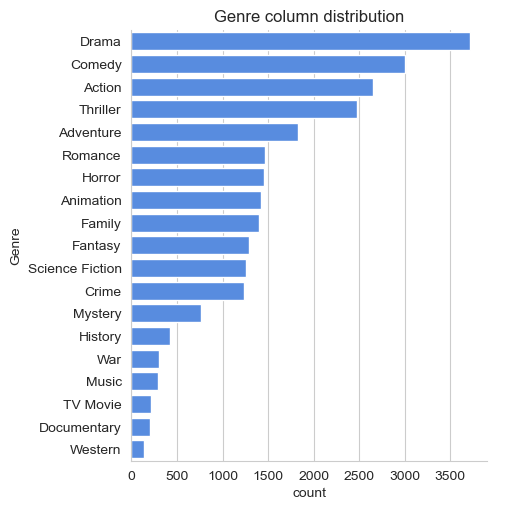

In [40]:
#to see the most frequent genre we applied the describe method to see that
#but if we want in the descending order type we plot a graph catplot graph to see the categories in proper order of their frequency
sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index,color='#4287f5')
plt.title('Genre column distribution')
plt.show()

In [41]:
'''
sns.catplot(...): This is the main command from the seaborn library for creating plots that show categorical data (data that fits into groups, like genres).

y='Genre': This tells the chart, "Put the different Genres on the Y-axis (the vertical one)." This is what makes it a horizontal bar chart.

data=df: This says, "The information you need is in this dataset, called df."

kind='count': This is the most important part. It says, "Don't just show the genres, count how many movies are in each one." So, it will count the number of Action movies, Comedy movies, etc.

order=df['Genre'].value_counts().index: This is a fancy way of saying, "Please sort the genres from the most common at the top to the least common at the bottom." It organizes the chart neatly.

color='#4287f5': This simply sets the color of all the bars to a specific shade of blue (that #4287f5 code is a hex code for blue)
'''

'\nsns.catplot(...): This is the main command from the seaborn library for creating plots that show categorical data (data that fits into groups, like genres).\n\ny=\'Genre\': This tells the chart, "Put the different Genres on the Y-axis (the vertical one)." This is what makes it a horizontal bar chart.\n\ndata=df: This says, "The information you need is in this dataset, called df."\n\nkind=\'count\': This is the most important part. It says, "Don\'t just show the genres, count how many movies are in each one." So, it will count the number of Action movies, Comedy movies, etc.\n\norder=df[\'Genre\'].value_counts().index: This is a fancy way of saying, "Please sort the genres from the most common at the top to the least common at the bottom." It organizes the chart neatly.\n\ncolor=\'#4287f5\': This simply sets the color of all the bars to a specific shade of blue (that #4287f5 code is a hex code for blue)\n'

# 2. which has highest votes in vote_average column?

In [42]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [43]:
#again in order to find the highest votes in the vote_average col we will apply the describe method to get the statistical summary of that col
df['Vote_Average'].describe()

count       25552
unique          4
top       average
freq         6613
Name: Vote_Average, dtype: object

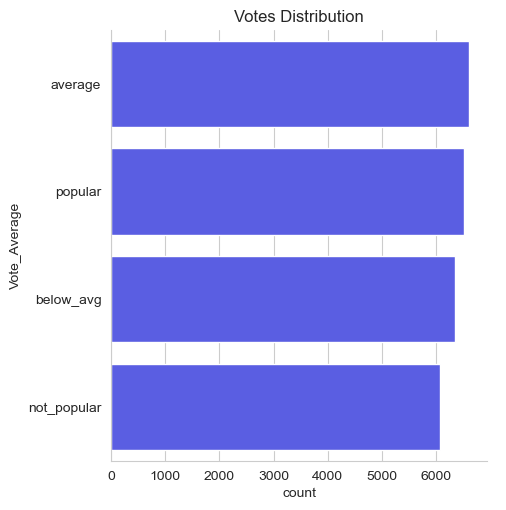

In [47]:
sns.catplot(y='Vote_Average',data=df,kind='count',order=df['Vote_Average'].value_counts().index,color='#4349f9')
plt.title('Votes Distribution')
plt.show()

# 3. what movie got the highest popularity? whats the genre?

In [48]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [49]:
#so we see that theres a called called popularity
#again well apply the describe method to get the statiscal summary of tht col
df['Popularity'].describe()

count    25552.000000
mean        41.973711
std        113.758561
min         13.354000
25%         16.363000
50%         21.844000
75%         36.462250
max       5083.954000
Name: Popularity, dtype: float64

In [50]:
#here we see whats the max value but we need the movie which has the highest popularity
df[df['Popularity']==df['Popularity'].max()]
  

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...


In [51]:
'''
here what we did is:
1. df['Popularity'].max() we get the max value from this column
2.df['Popularity']==df['Popularity'].max => df['Popularity']==the max value we got
so it now checks for a row which has this max value and gives us
'''


"\nhere what we did is:\n1. df['Popularity'].max() we get the max value from this column\n2.df['Popularity']==df['Popularity'].max => df['Popularity']==the max value we got\nso it now checks for a row which has this max value and gives us\n"

# 4. what movie got the lowest popularity? whats its genre?

In [52]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
25546,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,average,en,Music,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25547,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,average,en,Drama,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25548,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,average,en,History,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25549,1984,Threads,Documentary style account of a nuclear holocau...,13.354,186,popular,en,War,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...
25550,1984,Threads,Documentary style account of a nuclear holocau...,13.354,186,popular,en,Drama,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...
25551,1984,Threads,Documentary style account of a nuclear holocau...,13.354,186,popular,en,Science Fiction,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


In [53]:
'''
here what we are doing is:
df['Popularity'].min()=> df mein se we access the popularity col and we apply the min() method to get the minimum value
df['Popularity']==min value => now we find the row which has this min value 
'''

"\nhere what we are doing is:\ndf['Popularity'].min()=> df mein se we access the popularity col and we apply the min() method to get the minimum value\ndf['Popularity']==min value => now we find the row which has this min value \n"

# 5. which year has the most filmmed movies?

In [54]:
#we need to find the year which has the most movies filmmed => well apply the value_counts method on the release_date column
df['Release_Date'].value_counts()


Release_Date
2021    1636
2018    1384
2017    1365
2019    1271
2016    1209
        ... 
1920       4
1902       3
1925       2
1929       2
1930       2
Name: count, Length: 100, dtype: int64

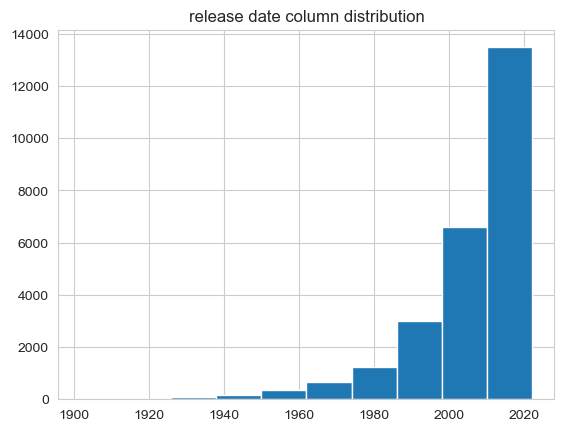

In [55]:
#well create a histogram to visualise
df['Release_Date'].hist()
plt.title('release date column distribution')
plt.show()

# SUMMARY
1. what is the most frequent genre in the dataset?
   Drama genre is the most frequent genre
2. what genres has highest votes?
   Drama gets the highest votes
3. what movie got the highest popularity? whats its genre?
   spider man:no way home and it has action , adventure, science fiction genre
4. what movie got lowest popularity? whats its genre?
   the united states and it has music , drama, war, sci-fi genre
5. which year has the most filmmed movies?
   year 2020 has the most filmmed movie